https://github.com/bertcarremans/air_pollution_forecasting/blob/master/notebooks/Visualizing%20Air%20Pollution%20in%20Belgium.ipynb

In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import folium
from folium.plugins import TimestampedGeoJson

making a dictionary

In [38]:
# 각 오염 물질마다, 배열을 달리 하여 색깔을 달리하기 위함. 각 파일의 이름이 xxx_1_xxx, 숫자가 오염 물질을 나타냄. 
pollutants = {
    1: {
        'notation' : 'SO2',
        'name' :'Sulphur dioxide',
        'bin_edges' : np.array([15,30,45,60,80,100,125,165,250])
    },
    5: {
        'notation' : 'PM10',
        'name' :'Particulate matter < 10 µm',
        'bin_edges' : np.array([10,20,30,40,50,70,100,150,200])
    },
    7: {'notation' : 'O3',
        'name' :'Ozone',
        'bin_edges' : np.array([30,50,70,90,110,145,180,240,360])
    },
    8: {'notation' : 'NO2',
        'name' :'Nitrogen dioxide',
        'bin_edges' : np.array([25,45,60,80,110,150,200,270,400])
    },
    10: {'notation' : 'CO',
        'name' :'Carbon monoxide',
         'bin_edges' : np.array([1.4,2.1,2.8,3.6,4.5,5.2,6.6,8.4,13.7])
    },
    20: {'notation' : 'C6H6',
        'name' :'Benzene',
         'bin_edges' : np.array([0.5,1.0,1.25,1.5,2.75,3.5,5.0,7.5,10.0])
    }
}

In [39]:
type(pollutants)

dict

Reading metadata

In [42]:
#구경
meta = pd.read_csv('data/BE_2013-2015_metadata.csv', sep='\t')
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 26 columns):
Countrycode                 1289 non-null object
Timezone                    1289 non-null object
Namespace                   1289 non-null object
AirQualityNetwork           1289 non-null object
AirQualityStation           1289 non-null object
AirQualityStationEoICode    1289 non-null object
AirQualityStationNatCode    1289 non-null object
SamplingPoint               1289 non-null object
SamplingProcess             1289 non-null object
Sample                      1289 non-null object
AirPollutant                1289 non-null object
AirPollutantCode            1289 non-null object
ObservationDateBegin        1289 non-null object
ObservationDateEnd          32 non-null object
Projection                  1289 non-null object
Longitude                   1289 non-null float64
Latitude                    1289 non-null float64
Altitude                    1289 non-null int64
MeasurementT

In [41]:
#구경
agg = pd.read_csv('data/raw/BE_1_2013-2015_aggregated_timeseries.csv', sep ='\t')
agg.head()


,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,AirPollutant,AirPollutantCode,DataAggregationProcess,AirPollutionLevel,UnitOfAirPollutionLevel,DataCapture,DataCoverage,TimeCoverage,DatetimeBegin,DatetimeEnd,Validity,Verification
0,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,83.333333,83.333333,2013-03-01 00:00:00,2013-03-02 00:00:00,1,1
1,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,87.500000,87.500000,2013-02-26 00:00:00,2013-02-27 00:00:00,1,1
2,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,87.500000,87.500000,2013-08-28 00:00:00,2013-08-29 00:00:00,1,1
3,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,95.833333,95.833333,2013-02-02 00:00:00,2013-02-03 00:00:00,1,1
4,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,95.833333,95.833333,2013-02-21 00:00:00,2013-02-22 00:00:00,1,1


In [44]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 6 columns):
DatetimeBegin        1872 non-null datetime64[ns]
SamplingPoint        1872 non-null object
Latitude             1872 non-null float64
Longitude            1872 non-null float64
AirPollutionLevel    1872 non-null float64
color                1872 non-null object
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 87.9+ KB


## Color scale: 10 bin deges for different color

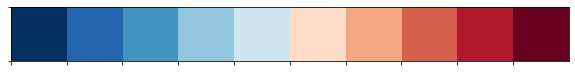

In [13]:
color_scale = np.array(['#053061','#2166ac','#4393c3','#92c5de','#d1e5f0','#fddbc7','#f4a582','#d6604d','#b2182b','#67001f'])
sns.palplot(sns.color_palette(color_scale))

## Loading the data

In [46]:
# 파일이름에는 BE로 시각하고, 오염 물질의 넘버가 중간에 있고, 이것을 csv로 가져오는데, parse_dates 를 시작과 끝 날짜를 날짜 데이터로 
# date_parser로 데이타 타입을 지정해 줌. 
def load_data(pollutant_ID):
    print('> Loading data...')
    date_vars = ['DatetimeBegin','DatetimeEnd']
    filename = 'data/raw/BE_' + str(pollutant_ID) + '_2013-2015_aggregated_timeseries.csv'
    agg_ts = pd.read_csv(filename, sep='\t', parse_dates=date_vars, date_parser=pd.to_datetime)
    return agg_ts

In [50]:
# 확인해 보자. 
df_check = pd.read_csv('data/raw/BE_1_2013-2015_aggregated_timeseries.csv',sep ='\t')
display(df_check.head())


,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,AirPollutant,AirPollutantCode,DataAggregationProcess,AirPollutionLevel,UnitOfAirPollutionLevel,DataCapture,DataCoverage,TimeCoverage,DatetimeBegin,DatetimeEnd,Validity,Verification
0,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,83.333333,83.333333,2013-03-01 00:00:00,2013-03-02 00:00:00,1,1
1,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,87.500000,87.500000,2013-02-26 00:00:00,2013-02-27 00:00:00,1,1
2,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,87.500000,87.500000,2013-08-28 00:00:00,2013-08-29 00:00:00,1,1
3,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,95.833333,95.833333,2013-02-02 00:00:00,2013-02-03 00:00:00,1,1
4,BE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELBE06,BELBE06,SPO-BELBE06_00001_100,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,1.0,µg/m3,100.0,95.833333,95.833333,2013-02-21 00:00:00,2013-02-22 00:00:00,1,1


In [59]:
# parge_dates는 추출하려는 것보다, 데이타 파입을 변경하기 위해서 쓰는 것 같다. 

In [20]:
 def clean_data(df):
    print('> Cleaning data...')
    df = df.loc[df.DataAggregationProcess=='P1D', :] 
    df = df.loc[df.UnitOfAirPollutionLevel!='count', :]
    ser_avail_days = df.groupby('SamplingPoint').nunique()['DatetimeBegin']
    df = df.loc[df.SamplingPoint.isin(ser_avail_days[ser_avail_days.values >= 1000].index), :]
    vars_to_drop = ['AirPollutant','AirPollutantCode','Countrycode','Namespace','TimeCoverage','Validity','Verification','AirQualityStation',
               'AirQualityStationEoICode','DataAggregationProcess','UnitOfAirPollutionLevel', 'DatetimeEnd', 'AirQualityNetwork',
               'DataCapture', 'DataCoverage']
    df.drop(columns=vars_to_drop, axis='columns', inplace=True)
    
    dates = list(pd.period_range(min(df.DatetimeBegin), max(df.DatetimeBegin), freq='D').values)
    samplingpoints = list(df.SamplingPoint.unique())
    new_idx = []
    for sp in samplingpoints:
        for d in dates:
            new_idx.append((sp, np.datetime64(d)))

    df.set_index(keys=['SamplingPoint', 'DatetimeBegin'], inplace=True)
    df.sort_index(inplace=True)
    df = df.reindex(new_idx)
    df['AirPollutionLevel'] = df.groupby(level=0).AirPollutionLevel.bfill().fillna(0)
    return df

In [21]:
def color_coding(poll, bin_edges):    
    idx = np.digitize(poll, bin_edges, right=True)
    return color_scale[idx]

def prepare_data(df, pollutant_ID):
    print('> Preparing data...')
    df = df.reset_index().merge(meta, how='inner', on='SamplingPoint').set_index('DatetimeBegin')
    df = df.loc[:, ['SamplingPoint','Latitude', 'Longitude', 'AirPollutionLevel']]
    df = df.groupby('SamplingPoint', group_keys=False).resample(rule='M').last().reset_index()
    df['color'] = df.AirPollutionLevel.apply(color_coding, bin_edges=pollutants[pollutant_ID]['bin_edges'])
    return df

In [22]:
def create_geojson_features(df):
    print('> Creating GeoJSON features...')
    features = []
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type':'Point', 
                'coordinates':[row['Longitude'],row['Latitude']]
            },
            'properties': {
                'time': row['DatetimeBegin'].date().__str__(),
                'style': {'color' : row['color']},
                'icon': 'circle',
                'iconstyle':{
                    'fillColor': row['color'],
                    'fillOpacity': 0.8,
                    'stroke': 'true',
                    'radius': 7
                }
            }
        }
        features.append(feature)
    return features

In [23]:
def make_map(features):
    print('> Making map...')
    coords_belgium=[50.5039, 4.4699]
    pollution_map = folium.Map(location=coords_belgium, control_scale=True, zoom_start=8)

    TimestampedGeoJson(
        {'type': 'FeatureCollection',
        'features': features}
        , period='P1M'
        , add_last_point=True
        , auto_play=False
        , loop=False
        , max_speed=1
        , loop_button=True
        , date_options='YYYY/MM'
        , time_slider_drag_update=True
    ).add_to(pollution_map)
    print('> Done.')
    return pollution_map

In [24]:

def plot_pollutant(pollutant_ID):
    print('Mapping {} pollution in Belgium in 2013-2015'.format(pollutants[pollutant_ID]['name']))
    df = load_data(pollutant_ID)
    df = clean_data(df)
    df = prepare_data(df, pollutant_ID)
    features = create_geojson_features(df)
    return make_map(features), df

In [25]:
pollution_map, df = plot_pollutant(1)
pollution_map.save('map/pollution_so2.html')
pollution_map

Mapping Sulphur dioxide pollution in Belgium in 2013-2015
> Loading data...
> Cleaning data...
> Preparing data...
> Creating GeoJSON features...
> Making map...
> Done.


In [26]:
pollution_map, df = plot_pollutant(5)
pollution_map.save('map/pollution_pm.html')
pollution_map

Mapping Particulate matter < 10 µm pollution in Belgium in 2013-2015
> Loading data...
> Cleaning data...
> Preparing data...
> Creating GeoJSON features...
> Making map...
> Done.


In [28]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 26 columns):
Countrycode                 1289 non-null object
Timezone                    1289 non-null object
Namespace                   1289 non-null object
AirQualityNetwork           1289 non-null object
AirQualityStation           1289 non-null object
AirQualityStationEoICode    1289 non-null object
AirQualityStationNatCode    1289 non-null object
SamplingPoint               1289 non-null object
SamplingProcess             1289 non-null object
Sample                      1289 non-null object
AirPollutant                1289 non-null object
AirPollutantCode            1289 non-null object
ObservationDateBegin        1289 non-null object
ObservationDateEnd          32 non-null object
Projection                  1289 non-null object
Longitude                   1289 non-null float64
Latitude                    1289 non-null float64
Altitude                    1289 non-null int64
MeasurementT

In [31]:
display(df)

,DatetimeBegin,SamplingPoint,Latitude,Longitude,AirPollutionLevel,color
0,2013-01-31,SPO-BELAB02_00005_100,51.340727,4.321820,25.812500,#4393c3
1,2013-02-28,SPO-BELAB02_00005_100,51.340727,4.321820,32.458333,#92c5de
2,2013-03-31,SPO-BELAB02_00005_100,51.340727,4.321820,35.895833,#92c5de
3,2013-04-30,SPO-BELAB02_00005_100,51.340727,4.321820,27.312500,#4393c3
4,2013-05-31,SPO-BELAB02_00005_100,51.340727,4.321820,50.583333,#fddbc7
...,...,...,...,...,...,...
1867,2015-08-31,SPO-BETR841_00005_100,51.002526,4.469321,18.391667,#2166ac
1868,2015-09-30,SPO-BETR841_00005_100,51.002526,4.469321,18.350000,#2166ac
1869,2015-10-31,SPO-BETR841_00005_100,51.002526,4.469321,34.433333,#92c5de
1870,2015-11-30,SPO-BETR841_00005_100,51.002526,4.469321,12.183333,#2166ac


NameError: name 'features' is not defined